In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/3-1/데이터마이닝

/content/drive/MyDrive/Colab Notebooks/3-1/데이터마이닝


In [3]:
#패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
sns.set(color_codes = True)   
sns.set_palette(palette = 'magma', n_colors = 8)

In [4]:
#데이터 불러오기
import pandas as pd 
df = pd.read_csv("./mxmh_survey_results.csv")
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [5]:
#데이터 행과 열 개수 확인
df.shape

(736, 33)

In [6]:
#데이터 구성 및 타입 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [7]:
#연속형 데이터(숫자) 분석
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


In [8]:
#연속형 데이터를 제외한 데이터
df.describe(exclude='number').T

,count,unique,top,freq
Timestamp,736,735,8/28/2022 16:15:08,2
Primary streaming service,735,6,Spotify,458
While working,733,2,Yes,579
Instrumentalist,732,2,No,497
Composer,735,2,No,609
Fav genre,736,16,Rock,188
Exploratory,736,2,Yes,525
Foreign languages,732,2,Yes,404
Frequency [Classical],736,4,Rarely,259
Frequency [Country],736,4,Never,343


In [9]:
#필요없는 열(attribute) 제거
df.drop(['Timestamp', 'Permissions', 'Primary streaming service'], axis=1, inplace=True)

<Axes: xlabel='Age', ylabel='Count'>

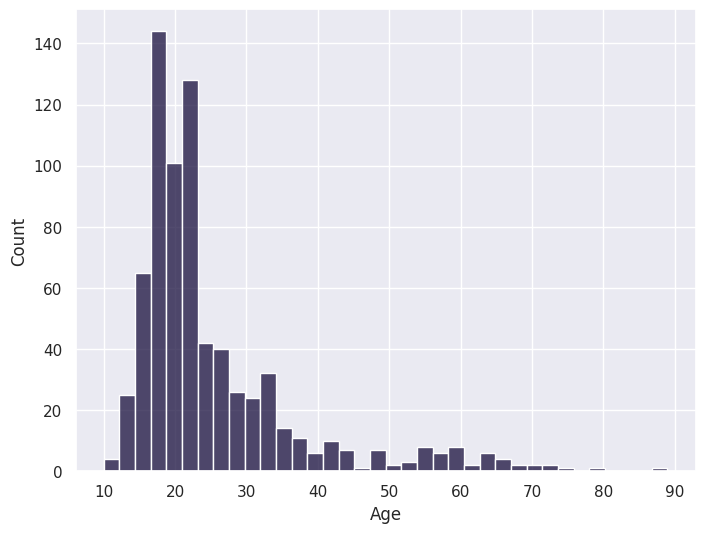

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(df['Age'])

<Axes: xlabel='Hours per day', ylabel='Count'>

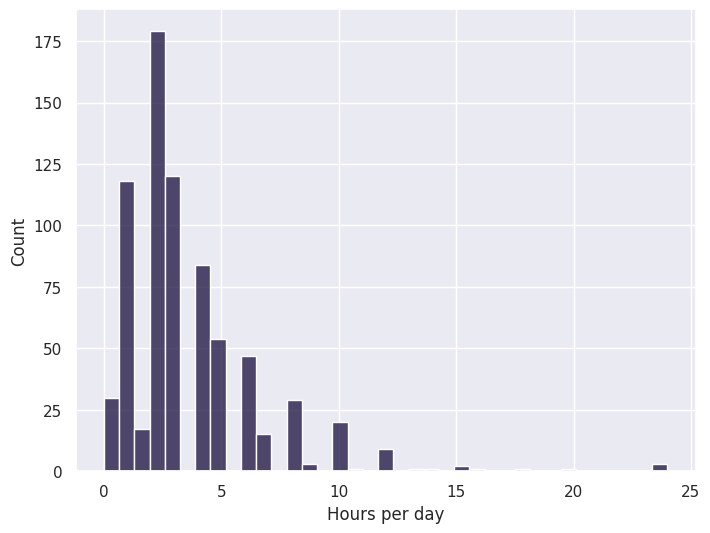

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(df['Hours per day'])

<Axes: xlabel='Anxiety', ylabel='Count'>

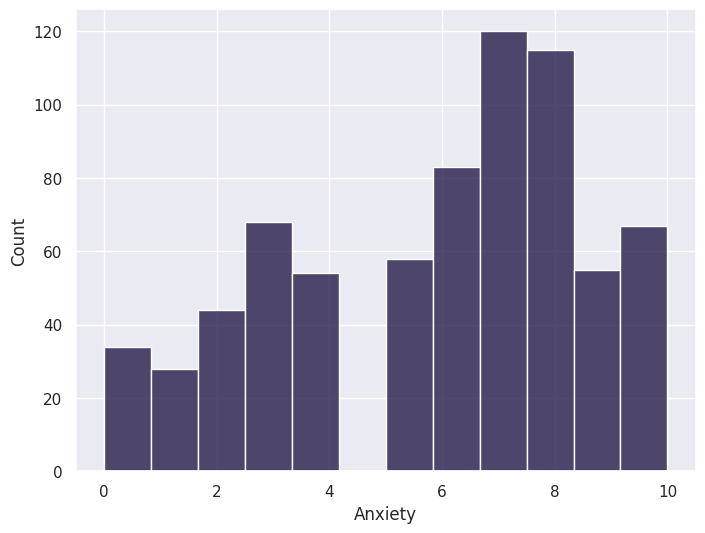

In [124]:
plt.figure(figsize=(8,6))
sns.histplot(df['Anxiety'])

In [12]:
age_index = df[(df['Age'] > 80)].index
df = df.drop(age_index, axis=0)

hpd_index = df[df['Hours per day'] >= 16].index
df = df.drop(hpd_index, axis=0)

bpm_mean = np.mean(df['BPM'])
bpm_std = np.std(df['BPM'])

In [13]:
#결측치 확인
df.isnull().sum()

Age                               1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             106
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                        0
Insomnia                    

In [57]:
df['Foreign languages'].describe()

count    726.000000
mean       0.552342
std        0.497596
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Foreign languages, dtype: float64

In [14]:
df.dropna(subset=['Foreign languages'], inplace=True)

In [15]:
df['Age'] = df['Age'].fillna(round(df['Age'].mean(), 0))
df['While working'] = df['While working'].fillna(df['While working'].mode()[0])
df['Instrumentalist'] = df['Instrumentalist'].fillna(df['Instrumentalist'].mode()[0])
df['Composer'] = df['Composer'].fillna(df['Composer'].mode()[0])
df['Music effects'] = df['Music effects'].fillna(df['Music effects'].mode()[0])

In [16]:
df.isnull().sum()

Age                               0
Hours per day                     0
While working                     0
Instrumentalist                   0
Composer                          0
Fav genre                         0
Exploratory                       0
Foreign languages                 0
BPM                             105
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                        0
Insomnia                    

In [17]:
miss_bpm = df[df['BPM'].isnull() == True]
miss_bpm

,Age,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
10,18.0,3.0,Yes,Yes,No,Country,Yes,No,NaN,Never,...,Rarely,Rarely,Never,Rarely,Never,7.0,7.0,4.0,7.0,No effect
12,25.0,3.0,Yes,No,No,Hip hop,Yes,Yes,NaN,Rarely,...,Sometimes,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve
15,17.0,2.0,No,No,No,Pop,Yes,Yes,NaN,Rarely,...,Very frequently,Rarely,Sometimes,Sometimes,Rarely,7.0,5.0,4.0,1.0,Worsen
30,20.0,5.0,Yes,Yes,No,Rock,Yes,Yes,NaN,Never,...,Sometimes,Sometimes,Sometimes,Very frequently,Rarely,7.0,7.0,2.0,0.0,Improve
32,19.0,6.0,Yes,Yes,No,Metal,Yes,Yes,NaN,Never,...,Sometimes,Never,Never,Sometimes,Sometimes,9.0,8.0,2.0,3.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,18.0,4.0,Yes,No,No,R&B,No,No,NaN,Never,...,Sometimes,Very frequently,Sometimes,Never,Never,8.0,0.0,0.0,2.0,No effect
700,20.0,1.0,Yes,No,No,Pop,No,Yes,NaN,Sometimes,...,Very frequently,Rarely,Sometimes,Rarely,Very frequently,8.0,9.0,6.0,5.0,Worsen
706,23.0,1.0,Yes,Yes,No,Rock,Yes,Yes,NaN,Rarely,...,Very frequently,Sometimes,Sometimes,Very frequently,Very frequently,8.0,6.0,1.0,4.0,Improve
712,23.0,3.0,Yes,No,No,Rock,No,No,NaN,Never,...,Sometimes,Rarely,Never,Very frequently,Never,10.0,5.0,2.0,0.0,Improve


In [18]:
miss_bpm_genre = ['Country', 'Hip hop', 'Pop', 'Rock', 'Metal', 'Classical',
       'Video game music', 'R&B', 'Folk', 'Jazz', 'EDM', 'Gospel',
       'K pop', 'Rap']

for i in miss_bpm_genre:
  df['BPM'] = df['BPM'].fillna(round(df[df['Fav genre']== i ]['BPM'].mean(), 0))

In [19]:
df

,Age,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve
1,63.0,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Improve
2,18.0,4.0,No,No,No,Video game music,No,Yes,132.0,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,Very frequently,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,18.0,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,Rarely,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,19.0,6.0,Yes,No,Yes,Rap,Yes,No,120.0,Rarely,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,19.0,5.0,Yes,Yes,No,Classical,No,No,170.0,Very frequently,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


In [20]:
df['Frequency [Classical]'].unique()

array(['Rarely', 'Sometimes', 'Never', 'Very frequently'], dtype=object)

In [21]:
df.columns[10]

'Frequency [Country]'

In [22]:
df['While working'].replace({'Yes':1, 'No':0}, inplace=True)
df['Instrumentalist'].replace({'Yes':1, 'No':0}, inplace=True)
df['Composer'].replace({'Yes':1, 'No':0}, inplace=True)
df['Exploratory'].replace({'Yes':1, 'No':0}, inplace=True)
df['Foreign languages'].replace({'Yes':1, 'No':0}, inplace=True)
df['Music effects'].replace({'Improve':2, 'No effect':1, 'Worsen':0}, inplace=True)

for i in range(9, 25):
  df[df.columns[i]].replace({'Never' : 0, 'Rarely' : 1, 'Sometimes' : 2, 'Very frequently' : 3}, inplace=True)

In [23]:
df['Fav genre'].unique()

array(['Latin', 'Rock', 'Video game music', 'Jazz', 'R&B', 'K pop',
       'Country', 'EDM', 'Hip hop', 'Pop', 'Rap', 'Classical', 'Metal',
       'Folk', 'Lofi', 'Gospel'], dtype=object)

# **X > 5**

In [108]:
df2 = df.copy(deep=True)
df2.drop(['Fav genre', 'Age'], axis=1, inplace=True)

#불안, 우울, 불면증, 강박 (0~10) 정도 가지고 새로운 feature engineering (실패함)
#불안, 우울, 불면증, 강박 (0~10) 정도 중 불안을 target attribute로 선정하면 나머지 3개 드랍. 이런 식으로 4번 진행하여
#각 정신건강에 미치는 공통적인 feature를 찾아서 결과 해석 및 도출
Anxiety = df2.copy(deep=True)
Anxiety.drop(['Depression', 'Insomnia', 'OCD'], axis=1, inplace=True)

In [110]:
Anxiety['Anxiety'] = Anxiety['Anxiety'].apply(lambda x: 1 if x < 5 else 0)

In [111]:
from sklearn.model_selection import train_test_split

X = Anxiety.drop(['Anxiety'], axis=1)
y = Anxiety['Anxiety']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((508, 24), (218, 24))

In [112]:
import sklearn
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

tree = DecisionTreeClassifier(criterion='entropy', random_state=999)
tree.fit(X_train, y_train)

# 일정 깊이에 도달하면 트리의 성장을 멈추게 하는 것 
# 과대적합이 줄어듬 
# 훈련세트의 정확도를  떨어뜨리지만 테스트 세트의 성능은 개선시킴
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [3,4,5],
    'min_samples_split' : [x for x in range(1, 101)]
}

grid_cv = GridSearchCV(tree, param_grid=params, scoring='f1', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 f1 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
GridSearchCV 최고 평균 f1 수치: 0.2840
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 5, 'min_samples_split': 4}


In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
precision = precision_score(y_test, pred1)
recall = recall_score(y_test, pred1)
f1 =  f1_score(y_test, pred1)

print('Decision Tree 예측 정확도: {0:.4f}'.format(accuracy))
print('Decision Tree 정밀도: {0:.4f}'.format(precision))
print('Decision Tree 재현율: {0:.4f}'.format(recall))
print('Decision Tree f1 스코어: {0:.4f}'.format(f1))

Decision Tree 예측 정확도: 0.6284
Decision Tree 정밀도: 0.4688
Decision Tree 재현율: 0.1899
Decision Tree f1 스코어: 0.2703


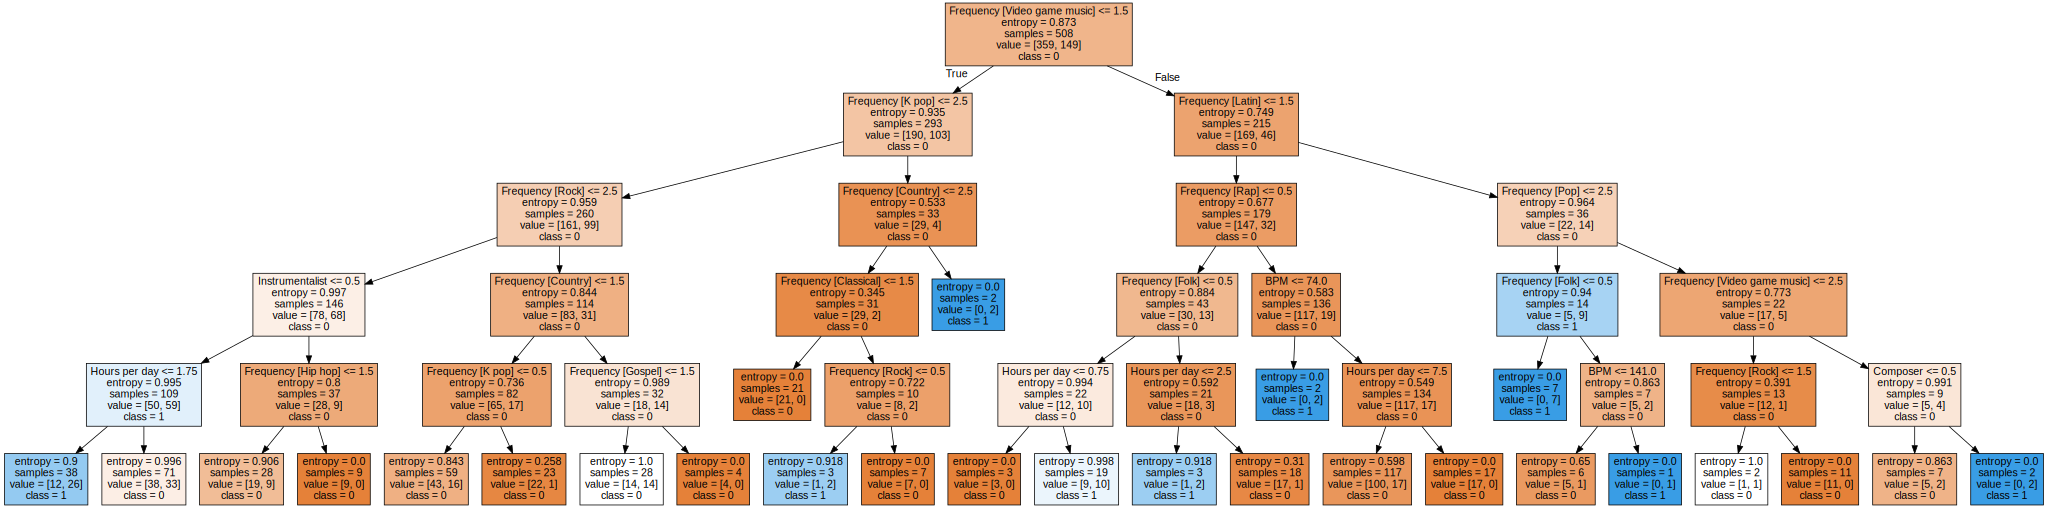

In [115]:
from sklearn.tree import export_graphviz
export_graphviz(best_df_clf, out_file ="tree.dot", class_names = ['0', '1'], feature_names = X.columns, 
                filled=True)

import graphviz 

with open("tree.dot" ,encoding="UTF-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

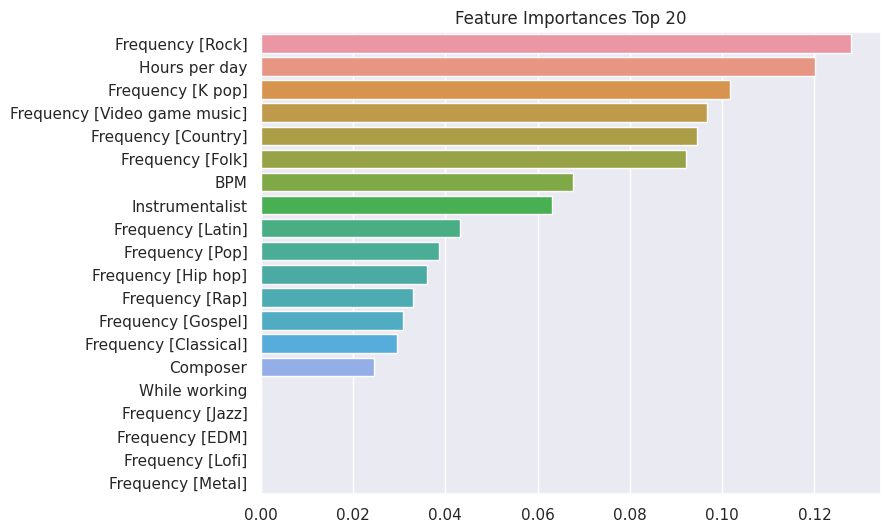

In [116]:
import seaborn as sns

feature_importance_values = best_df_clf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances_1 = pd.Series(feature_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top20_1 = feature_importances_1.sort_values(ascending=False)[:20]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_top20_1, y=feature_top20_1.index)
plt.show()

In [117]:
Depression = df2.copy(deep=True)
Depression.drop(['Anxiety', 'Insomnia', 'OCD'], axis=1, inplace=True)

In [118]:
Depression['Depression'].describe()

count    726.000000
mean       4.804408
std        3.028081
min        0.000000
25%        2.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: Depression, dtype: float64

In [119]:
Depression['Depression'] = Depression['Depression'].apply(lambda x: 1 if x < 5 else 0)

In [120]:
from sklearn.model_selection import train_test_split

X = Depression.drop(['Depression'], axis=1)
y = Depression['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 998)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((508, 24), (218, 24))

In [121]:
import sklearn
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

tree = DecisionTreeClassifier(criterion='entropy', random_state=998)
tree.fit(X_train, y_train)

# 일정 깊이에 도달하면 트리의 성장을 멈추게 하는 것 
# 과대적합이 줄어듬 
# 훈련세트의 정확도를  떨어뜨리지만 테스트 세트의 성능은 개선시킴
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [3,4,5],
    'min_samples_split' : [x for x in range(1, 101)]
}

grid_cv = GridSearchCV(tree, param_grid=params, scoring='f1', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 f1 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
GridSearchCV 최고 평균 f1 수치: 0.4025
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 5, 'min_samples_split': 10}


In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
precision = precision_score(y_test, pred1)
recall = recall_score(y_test, pred1)
f1 =  f1_score(y_test, pred1)

print('Decision Tree 예측 정확도: {0:.4f}'.format(accuracy))
print('Decision Tree 정밀도: {0:.4f}'.format(precision))
print('Decision Tree 재현율: {0:.4f}'.format(recall))
print('Decision Tree f1 스코어: {0:.4f}'.format(f1))

Decision Tree 예측 정확도: 0.5275
Decision Tree 정밀도: 0.4727
Decision Tree 재현율: 0.2600
Decision Tree f1 스코어: 0.3355


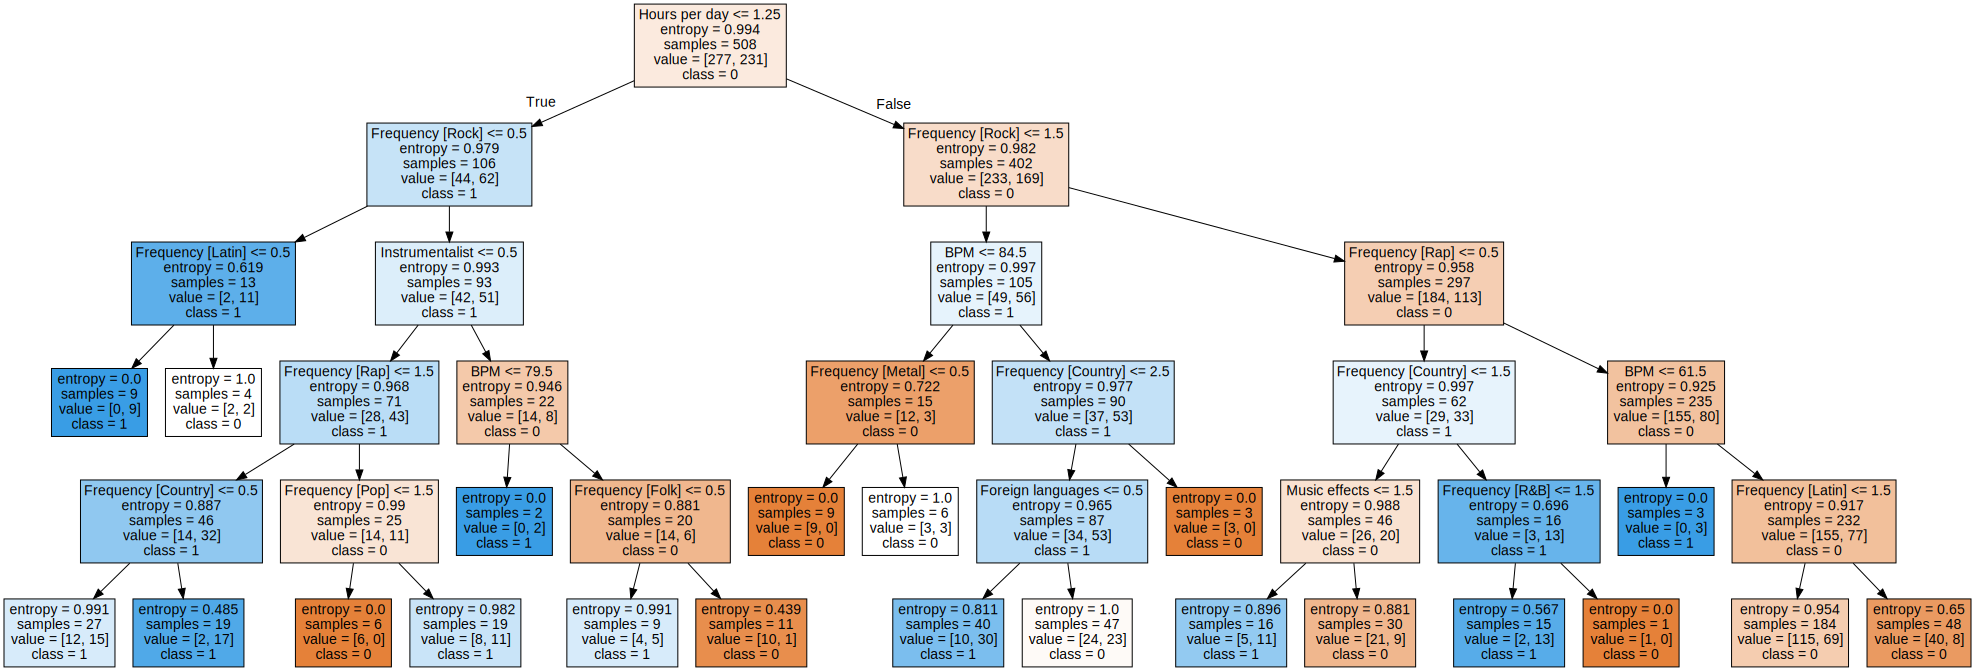

In [123]:
from sklearn.tree import export_graphviz
export_graphviz(best_df_clf, out_file ="tree.dot", class_names = ['0', '1'], feature_names = X.columns, 
                filled=True)

import graphviz 

with open("tree.dot" ,encoding="UTF-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

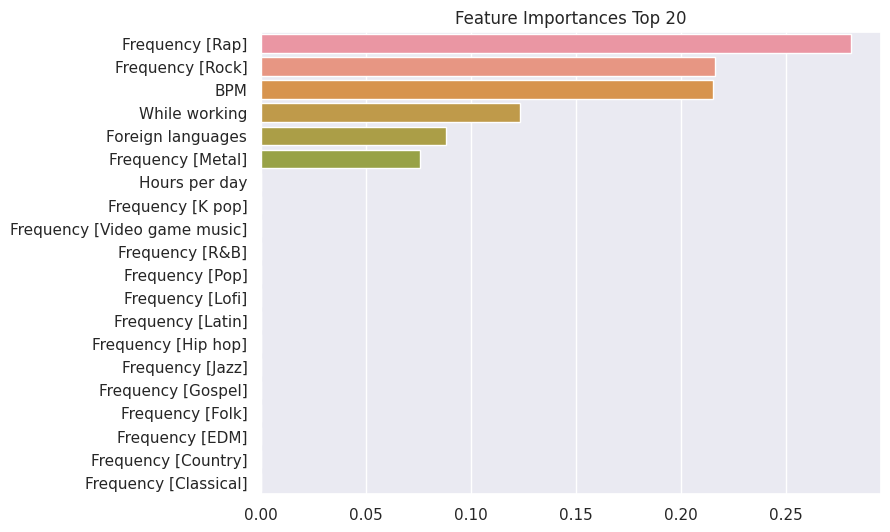

In [75]:
import seaborn as sns

feature_importance_values = best_df_clf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances_2 = pd.Series(feature_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top20_2 = feature_importances_2.sort_values(ascending=False)[:20]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_top20_2, y=feature_top20_2.index)
plt.show()

In [76]:
Insomnia = df2.copy(deep=True)
Insomnia.drop(['Depression', 'Anxiety', 'OCD'], axis=1, inplace=True)

In [77]:
Insomnia['Insomnia'].describe()

count    726.000000
mean       3.726584
std        3.085892
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       10.000000
Name: Insomnia, dtype: float64

In [78]:
Insomnia['Insomnia'] = Insomnia['Insomnia'].apply(lambda x: 1 if x >= 3 else 0)

In [79]:
from sklearn.model_selection import train_test_split

X = Insomnia.drop(['Insomnia'], axis=1)
y = Insomnia['Insomnia']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 998)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((508, 24), (218, 24))

In [80]:
import sklearn
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

tree = DecisionTreeClassifier(criterion='entropy', random_state=998)
tree.fit(X_train, y_train)

# 일정 깊이에 도달하면 트리의 성장을 멈추게 하는 것 
# 과대적합이 줄어듬 
# 훈련세트의 정확도를  떨어뜨리지만 테스트 세트의 성능은 개선시킴
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [3,4,5],
    'min_samples_split' : [x for x in range(1, 101)]
}

grid_cv = GridSearchCV(tree, param_grid=params, scoring='f1', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 f1 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
GridSearchCV 최고 평균 f1 수치: 0.6634
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 4, 'min_samples_split': 20}


In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
precision = precision_score(y_test, pred1)
recall = recall_score(y_test, pred1)
f1 =  f1_score(y_test, pred1)

print('Decision Tree 예측 정확도: {0:.4f}'.format(accuracy))
print('Decision Tree 정밀도: {0:.4f}'.format(precision))
print('Decision Tree 재현율: {0:.4f}'.format(recall))
print('Decision Tree f1 스코어: {0:.4f}'.format(f1))

Decision Tree 예측 정확도: 0.5596
Decision Tree 정밀도: 0.5789
Decision Tree 재현율: 0.8049
Decision Tree f1 스코어: 0.6735


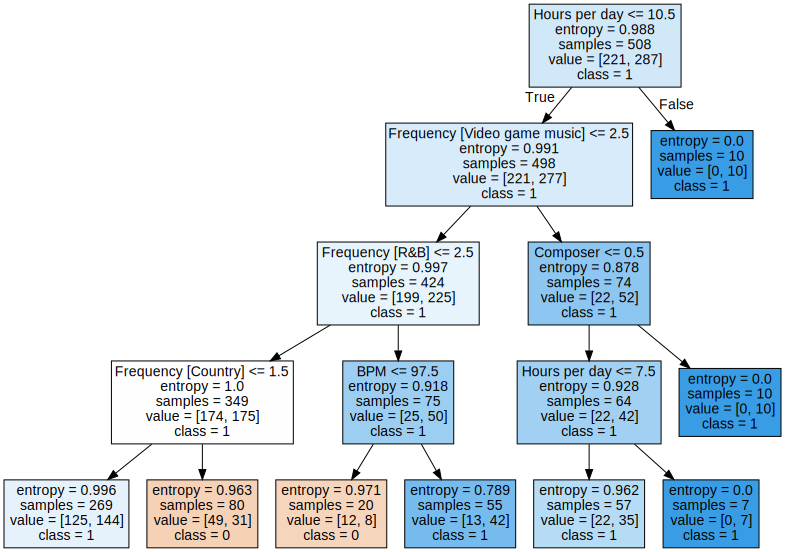

In [82]:
from sklearn.tree import export_graphviz
export_graphviz(best_df_clf, out_file ="tree.dot", class_names = ['0', '1'], feature_names = X.columns, 
                filled=True)

import graphviz 

with open("tree.dot" ,encoding="UTF-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

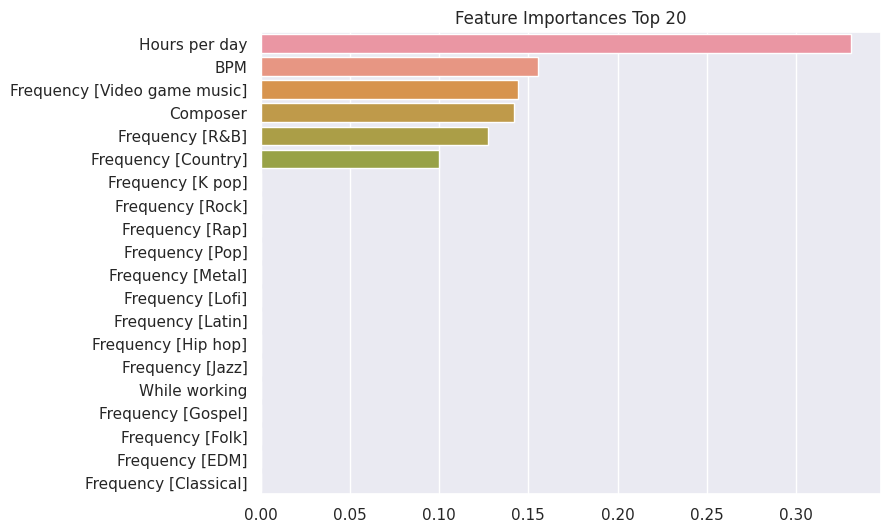

In [83]:
import seaborn as sns

feature_importance_values = best_df_clf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances_3 = pd.Series(feature_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top20_3 = feature_importances_3.sort_values(ascending=False)[:20]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_top20_3, y=feature_top20_3.index)
plt.show()

In [84]:
OCD = df2.copy(deep=True)
OCD.drop(['Depression', 'Anxiety', 'Insomnia'], axis=1, inplace=True)

In [85]:
OCD['OCD'].describe()

count    726.00000
mean       2.61708
std        2.83185
min        0.00000
25%        0.00000
50%        2.00000
75%        4.00000
max       10.00000
Name: OCD, dtype: float64

In [86]:
OCD['OCD'] = OCD['OCD'].apply(lambda x: 1 if x >= 3 else 0)

In [87]:
from sklearn.model_selection import train_test_split

X = OCD.drop(['OCD'], axis=1)
y = OCD['OCD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 998)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((508, 24), (218, 24))

In [88]:
import sklearn
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

tree = DecisionTreeClassifier(criterion='entropy', random_state=998)
tree.fit(X_train, y_train)

# 일정 깊이에 도달하면 트리의 성장을 멈추게 하는 것 
# 과대적합이 줄어듬 
# 훈련세트의 정확도를  떨어뜨리지만 테스트 세트의 성능은 개선시킴
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [3,4,5],
    'min_samples_split' : [x for x in range(1, 101)]
}

grid_cv = GridSearchCV(tree, param_grid=params, scoring='f1', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 f1 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
GridSearchCV 최고 평균 f1 수치: 0.3778
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 5, 'min_samples_split': 93}


In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
precision = precision_score(y_test, pred1)
recall = recall_score(y_test, pred1)
f1 =  f1_score(y_test, pred1)

print('Decision Tree 예측 정확도: {0:.4f}'.format(accuracy))
print('Decision Tree 정밀도: {0:.4f}'.format(precision))
print('Decision Tree 재현율: {0:.4f}'.format(recall))
print('Decision Tree f1 스코어: {0:.4f}'.format(f1))

Decision Tree 예측 정확도: 0.5963
Decision Tree 정밀도: 0.4528
Decision Tree 재현율: 0.2892
Decision Tree f1 스코어: 0.3529


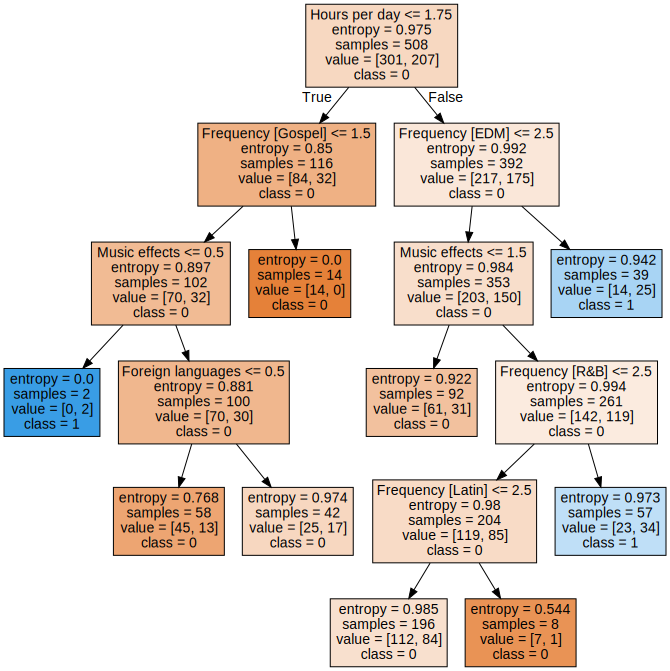

In [90]:
from sklearn.tree import export_graphviz
export_graphviz(best_df_clf, out_file ="tree.dot", class_names = ['0', '1'], feature_names = X.columns, 
                filled=True)

import graphviz 

with open("tree.dot" ,encoding="UTF-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

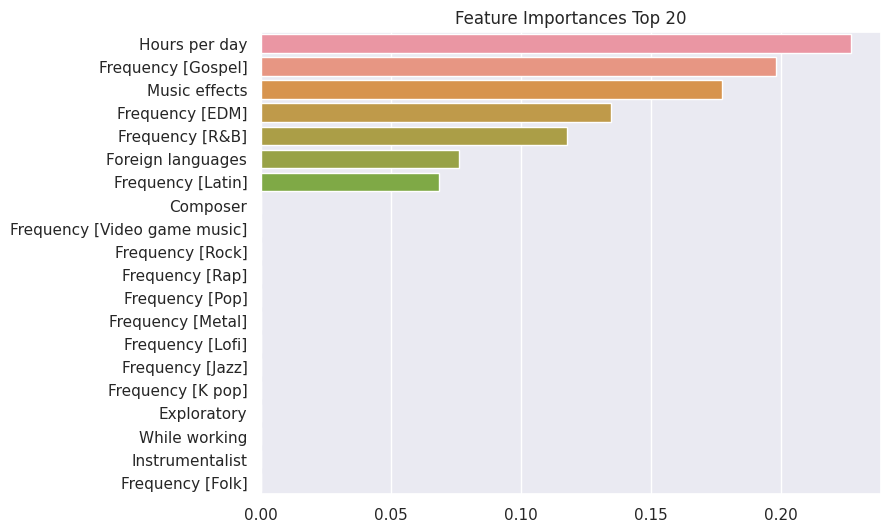

In [91]:
import seaborn as sns

feature_importance_values = best_df_clf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances_4 = pd.Series(feature_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top20_4 = feature_importances_4.sort_values(ascending=False)[:20]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_top20_4, y=feature_top20_4.index)
plt.show()

In [92]:
feature_final = feature_importances_1 + feature_importances_2 + feature_importances_3 + feature_importances_4

In [93]:
feature_best = feature_final.sort_values(ascending=False)[:10]
feature_best

Frequency [Rap]                 0.674579
Hours per day                   0.557877
BPM                             0.370256
Frequency [Country]             0.348460
Frequency [Latin]               0.289598
Frequency [Video game music]    0.281349
Frequency [R&B]                 0.245306
Frequency [Rock]                0.216017
Frequency [Gospel]              0.198093
Music effects                   0.177374
dtype: float64